## What you will learn in this course

- How to plot geospatial points as scatterplots
- How to plot geometries using `geopandas`
- How to construct a `GeoDataFrame` from a `DatFrame`
- How to spatially join datasets
- How to add a street map to your plots
- When and how to create a choropleth

## Longitude and latitude


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
school = pd.read_csv('./DATASETS/schools.csv')

In [3]:
school.head()

,School ID,School Name,Street Address,City,State,ZIP Code,Phone Number,School State ID,School Level,Lowest Grade,Highest Grade,Latitude,Longitude,School Website,Cluster,Mapped Location
0,496,A. Z. Kelley Elementary,5834 Pettus Road,Antioch,TN,37013,(615)941-7535,1,Elementary School,Grade P3,Grade 4,36.021817,-86.658848,http://schools.mnps.org/az-kelley-elementary-s...,Cane Ridge,"(36.02181712, -86.65884778)"
1,375,Alex Green Elementary,3921 Lloyd Road,Whites Creek,TN,37189,(615)876-5105,5,Elementary School,Grade P4,Grade 4,36.252961,-86.832229,http://schools.mnps.org/alex-green-elementary-...,Whites Creek,"(36.2529607, -86.8322292)"
2,105,Amqui Elementary,319 Anderson Lane,Madison,TN,37115,(615)612-3678,10,Elementary School,Grade P3,Grade 4,36.273766,-86.703832,http://schools.mnps.org/amqui-elementary-school,Hunters Lane,"(36.27376585, -86.70383153)"
3,460,Andrew Jackson Elementary,110 Shute Ln,Old Hickory,TN,37138,(615)847-7317,15,Elementary School,Grade P4,Grade 4,36.231585,-86.623775,http://schools.mnps.org/andrew-jackson-element...,McGavock,"(36.23158465, -86.62377469)"
4,110,Antioch High School,1900 Hobson Pike,Antioch,TN,37013,(615)641-5400,20,High School,Grade 9,Grade 12,36.046675,-86.599418,http://schools.mnps.org/antioch-high-school,Antioch,"(36.04667464, -86.59941833)"


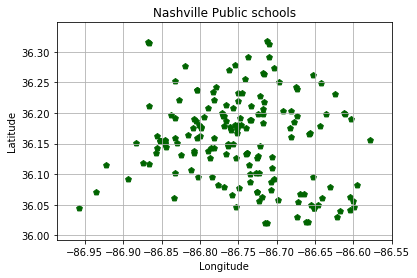

In [4]:
plt.scatter(school.Longitude, school.Latitude, c='darkgreen', marker='p')

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Nashville Public schools')
plt.grid()
plt.show()

## Shapefiles

- Store a special type of data known as *geometry*.

- Types:
	- Point: one lat-lng pair
 	- Line: two or more lat-lng pairs
	- Polygon: many lat-lng pairs

## Shapefiles components

- `my_map.shp` : contains the geometry
- `my_map.dbf` : holds the attributes for each geometry
- `my_map.shx` : links the attributes to the geometry

## `geopandas`

This code reads a shapefile into a GeoDataFrame and looks at the first few rows

~~~
import geopandas as gpd

geo_df = gpd.read_file('My_Map_Files/my_map.shp')
geo_df.head()
~~~

- For more on `geopandas`, check the [documentation](http://geopandas.org/).

## Viewing a geometry

~~~
service_districts.loc[0, 'geometry']
~~~

## Plotting a GeoDataFrame

~~~
school_districts.plot(column='district', legend=True)

plt.show()
~~~

## Combining scatterplots an polygons

~~~
school_districts.plot(column='district', legend=True, cmap='Set2')

plt.scatter(shools.lng, schools.lat, marker='p', c='darkgreen')

plt.title('Nashville Schools and School Districts')
plt.show()
~~~

<img src='./IMAGES/scatterplots-geometry.PNG'>


## Plotting with GeoJSON

In [5]:
import geopandas as gpd

In [6]:
neighborhoods = gpd.read_file('./DATASETS/neighborhoods.geojson')

print(neighborhoods.head())

                   name                                           geometry
0  Historic Buena Vista  (POLYGON ((-86.79511056795417 36.1757596496334...
1        Charlotte Park  (POLYGON ((-86.87459668651866 36.1575770268129...
2              Hillwood  (POLYGON ((-86.87613708067906 36.1355409894979...
3            West Meade  (POLYGON ((-86.9038380396094 36.1255414807897,...
4          White Bridge  (POLYGON ((-86.86321427797685 36.1288622289404...


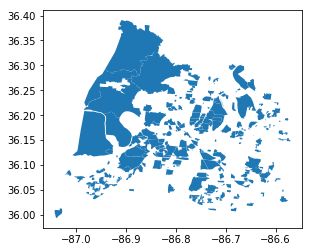

In [7]:
neighborhoods.plot()

## Geopandas dependencies

- Fiona
	- provides a Python API for OGR
- GDAL/OGR
	- GDAL for translating raster data
	- OGR for translating vector data

<img src='./IMAGES/geopandas-dependencies.PNG'>


## Plotting with color

In [8]:
schools_districts = gpd.read_file('./DATASETS/school_districts.geojson')

print(schools_districts.head(3))

   first_name       city    zip                           email state  \
0  Dr. Sharon  Nashville  37218  gentryfordistrict1@comcast.net    TN   
1        Jill    Madison  37115          jill.speering@mnps.org    TN   
2  Dr. Jo Ann  Nashville  37220          joann.brannon@mnps.org    TN   

  last_name                address    position term_expir district  \
0    Gentry        6108 Beals Lane      Member       2016        1   
1  Speering      1033 Falls Avenue  Vice-Chair       2016        3   
2   Brannon  5444 San Marcos Drive      Member       2018        2   

          phone                                           geometry  
0  615-268-5269  (POLYGON ((-86.77136400034288 36.3835669997190...  
1  615-562-5234  (POLYGON ((-86.75364713283636 36.4042760799855...  
2  615-833-5976  (POLYGON ((-86.76696199971282 36.0833250002130...  


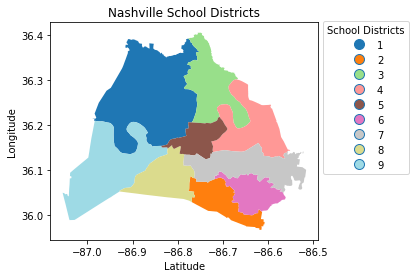

In [9]:
# Set legend style
lgnd_kwds = {'title': 'School Districts',
               'loc': 'upper left', 'bbox_to_anchor': (1, 1.03), 'ncol': 1}

# Plot the school districts using the tab20 colormap (qualitative)
schools_districts.plot(column = 'district', cmap = 'tab20', legend = True, legend_kwds = lgnd_kwds)
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Nashville School Districts')
plt.show()

***

## Coordinate Reference Systems

- EPSG: 4326
	- used by Google Earth
	- units are decimal degrees
- EPSG: 3857
	- used by Google Maps, Bing Maps, Open Street Maps
	- units are meters

## Creating a geometry column

In [10]:
from shapely.geometry import Point

school['geometry'] = school.apply(lambda x: Point((x.Longitude, x.Latitude)), axis=1)

print(school.head())

   School ID                School Name     Street Address          City  \
0        496    A. Z. Kelley Elementary   5834 Pettus Road       Antioch   
1        375      Alex Green Elementary    3921 Lloyd Road  Whites Creek   
2        105           Amqui Elementary  319 Anderson Lane       Madison   
3        460  Andrew Jackson Elementary       110 Shute Ln   Old Hickory   
4        110        Antioch High School   1900 Hobson Pike       Antioch   

  State  ZIP Code   Phone Number  School State ID       School Level  \
0    TN     37013  (615)941-7535                1  Elementary School   
1    TN     37189  (615)876-5105                5  Elementary School   
2    TN     37115  (615)612-3678               10  Elementary School   
3    TN     37138  (615)847-7317               15  Elementary School   
4    TN     37013  (615)641-5400               20        High School   

  Lowest Grade Highest Grade   Latitude  Longitude  \
0     Grade P3       Grade 4  36.021817 -86.658848   
1 

In [11]:
school_crs = {'init': 'epsg:4326'}

school_geo = gpd.GeoDataFrame(school, crs = school_crs, geometry = school.geometry)

In [12]:
school_geo.head()

,School ID,School Name,Street Address,City,State,ZIP Code,Phone Number,School State ID,School Level,Lowest Grade,Highest Grade,Latitude,Longitude,School Website,Cluster,Mapped Location,geometry
0,496,A. Z. Kelley Elementary,5834 Pettus Road,Antioch,TN,37013,(615)941-7535,1,Elementary School,Grade P3,Grade 4,36.021817,-86.658848,http://schools.mnps.org/az-kelley-elementary-s...,Cane Ridge,"(36.02181712, -86.65884778)",POINT (-86.65884778 36.02181712)
1,375,Alex Green Elementary,3921 Lloyd Road,Whites Creek,TN,37189,(615)876-5105,5,Elementary School,Grade P4,Grade 4,36.252961,-86.832229,http://schools.mnps.org/alex-green-elementary-...,Whites Creek,"(36.2529607, -86.8322292)",POINT (-86.8322292 36.2529607)
2,105,Amqui Elementary,319 Anderson Lane,Madison,TN,37115,(615)612-3678,10,Elementary School,Grade P3,Grade 4,36.273766,-86.703832,http://schools.mnps.org/amqui-elementary-school,Hunters Lane,"(36.27376585, -86.70383153)",POINT (-86.70383153 36.27376585)
3,460,Andrew Jackson Elementary,110 Shute Ln,Old Hickory,TN,37138,(615)847-7317,15,Elementary School,Grade P4,Grade 4,36.231585,-86.623775,http://schools.mnps.org/andrew-jackson-element...,McGavock,"(36.23158465, -86.62377469)",POINT (-86.62377469 36.23158465)
4,110,Antioch High School,1900 Hobson Pike,Antioch,TN,37013,(615)641-5400,20,High School,Grade 9,Grade 12,36.046675,-86.599418,http://schools.mnps.org/antioch-high-school,Antioch,"(36.04667464, -86.59941833)",POINT (-86.59941833000001 36.04667464)


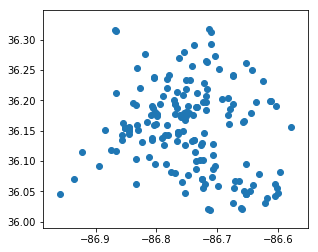

In [13]:
school_geo.plot()

***

In [14]:
art = pd.read_csv('./DATASETS/public_art.csv')

In [15]:
# Print the first few rows of the art DataFrame
print(art.head())

                             Title                                 Last Name  \
0          [Cross Country Runners]                                     Frost   
1  [Fourth and Commerce Sculpture]                                    Walker   
2              12th & Porter Mural                                   Kennedy   
3                A Splash of Color  Stevenson and Stanley and ROFF (Harroff)   
4             A Story of Nashville                                    Ridley   

                  First Name                           Location  \
0                      Miley     4001 Harding Rd., Nashville TN   
1                        Lin  333 Commerce Street, Nashville TN   
2                        Kim                  114 12th Avenue N   
3  Doug and Ronnica and Lynn                   616 17th Ave. N.   
4                       Greg    615 Church Street, Nashville TN   

                                              Medium       Type  \
0                                             Bro

In [16]:
# Create a geometry column from lng & lat
art['geometry'] = art.apply(lambda x: Point(float(x.Latitude), float(x.Longitude)), axis=1)

# Create a GeoDataFrame from art and verify the type
art_geo = gpd.GeoDataFrame(art, crs = {'init': 'epsg:4326'}, geometry = art.geometry)
print(type(art_geo))


<class 'geopandas.geodataframe.GeoDataFrame'>


***

In [17]:
council_districts = gpd.read_file('./DATASETS/council_districts.geojson')

In [18]:
council_districts.head()

,first_name,email,res_phone,bus_phone,last_name,position,district,geometry
0,Nick,nick.leonardo@nashville.gov,615-509-6334,615-862-6780,Leonardo,Council Member,1,(POLYGON ((-86.90738248774342 36.3905151283193...
1,DeCosta,decosta.hastings@nashville.gov,615-779-1565,615-862-6780,Hastings,Council Member,2,(POLYGON ((-86.75902399986667 36.2309080000732...
2,Nancy,nancy.vanreece@nashville.gov,615-576-0488,615-862-6780,VanReece,Council Member,8,(POLYGON ((-86.72850199989709 36.2832840002146...
3,Bill,bill.pridemore@nashville.gov,615-915-1419,615-862-6780,Pridemore,Council Member,9,(POLYGON ((-86.68680500011935 36.2867050001350...
4,Robert,robert.swope@nashville.gov,615-308-0577,615-862-6780,Swope,Council Member,4,(POLYGON ((-86.74488864807594 36.0531632050230...


## The `.sjoin` `op` argument

~~~
gpd.sjoin(blue_region_gdf, black_region_gdf, op=<operation>)
~~~
- `<operation>` can be: `intersects`, `contains` or `within`

## Using `.sjoin()`


In [19]:
within_gdf = gpd.sjoin(council_districts, schools_districts, op='within')

In [20]:
print('council districts within school districts: ', within_gdf.shape[0])

council districts within school districts:  11


In [21]:
contains_gdf = gpd.sjoin(schools_districts, council_districts, op='contains')

In [22]:
print('school districts contain council districts: ', contains_gdf.shape[0])

school districts contain council districts:  11


In [23]:
intersects_gdf = gpd.sjoin(council_districts, schools_districts, op='intersects')

In [24]:
print('council districts intersect school districts: ', intersects_gdf.shape[0])

council districts intersect school districts:  100


In [25]:
within_gdf.head()

,first_name_left,email_left,res_phone,bus_phone,last_name_left,position_left,district_left,geometry,index_right,first_name_right,city,zip,email_right,state,last_name_right,address,position_right,term_expir,district_right,phone
0,Nick,nick.leonardo@nashville.gov,615-509-6334,615-862-6780,Leonardo,Council Member,1,(POLYGON ((-86.90738248774342 36.3905151283193...,0,Dr. Sharon,Nashville,37218,gentryfordistrict1@comcast.net,TN,Gentry,6108 Beals Lane,Member,2016,1,615-268-5269
1,DeCosta,decosta.hastings@nashville.gov,615-779-1565,615-862-6780,Hastings,Council Member,2,(POLYGON ((-86.75902399986667 36.2309080000732...,0,Dr. Sharon,Nashville,37218,gentryfordistrict1@comcast.net,TN,Gentry,6108 Beals Lane,Member,2016,1,615-268-5269
2,Nancy,nancy.vanreece@nashville.gov,615-576-0488,615-862-6780,VanReece,Council Member,8,(POLYGON ((-86.72850199989709 36.2832840002146...,1,Jill,Madison,37115,jill.speering@mnps.org,TN,Speering,1033 Falls Avenue,Vice-Chair,2016,3,615-562-5234
3,Bill,bill.pridemore@nashville.gov,615-915-1419,615-862-6780,Pridemore,Council Member,9,(POLYGON ((-86.68680500011935 36.2867050001350...,1,Jill,Madison,37115,jill.speering@mnps.org,TN,Speering,1033 Falls Avenue,Vice-Chair,2016,3,615-562-5234
9,Doug,doug.pardue@nashville.gov,615-859-9370,615-305-3945,Pardue,Council Member,10,(POLYGON ((-86.75364713283636 36.4042760799855...,1,Jill,Madison,37115,jill.speering@mnps.org,TN,Speering,1033 Falls Avenue,Vice-Chair,2016,3,615-562-5234


## Aggregate spatially joined data

~~~
# first rename district_left and district_right
within_gdf.district_left = council_districts
within_gdf.district_right = schools_districts
~~~

In [26]:
within_gdf.head()

,first_name_left,email_left,res_phone,bus_phone,last_name_left,position_left,district_left,geometry,index_right,first_name_right,city,zip,email_right,state,last_name_right,address,position_right,term_expir,district_right,phone
0,Nick,nick.leonardo@nashville.gov,615-509-6334,615-862-6780,Leonardo,Council Member,1,(POLYGON ((-86.90738248774342 36.3905151283193...,0,Dr. Sharon,Nashville,37218,gentryfordistrict1@comcast.net,TN,Gentry,6108 Beals Lane,Member,2016,1,615-268-5269
1,DeCosta,decosta.hastings@nashville.gov,615-779-1565,615-862-6780,Hastings,Council Member,2,(POLYGON ((-86.75902399986667 36.2309080000732...,0,Dr. Sharon,Nashville,37218,gentryfordistrict1@comcast.net,TN,Gentry,6108 Beals Lane,Member,2016,1,615-268-5269
2,Nancy,nancy.vanreece@nashville.gov,615-576-0488,615-862-6780,VanReece,Council Member,8,(POLYGON ((-86.72850199989709 36.2832840002146...,1,Jill,Madison,37115,jill.speering@mnps.org,TN,Speering,1033 Falls Avenue,Vice-Chair,2016,3,615-562-5234
3,Bill,bill.pridemore@nashville.gov,615-915-1419,615-862-6780,Pridemore,Council Member,9,(POLYGON ((-86.68680500011935 36.2867050001350...,1,Jill,Madison,37115,jill.speering@mnps.org,TN,Speering,1033 Falls Avenue,Vice-Chair,2016,3,615-562-5234
9,Doug,doug.pardue@nashville.gov,615-859-9370,615-305-3945,Pardue,Council Member,10,(POLYGON ((-86.75364713283636 36.4042760799855...,1,Jill,Madison,37115,jill.speering@mnps.org,TN,Speering,1033 Falls Avenue,Vice-Chair,2016,3,615-562-5234


In [27]:
cols = ['district_left','district_right']
within_gdf[cols].groupby('district_right').agg('count').sort_values('district_left',ascending=False)

,district_left
district_right,
3,3
1,2
9,2
2,1
5,1
6,1
8,1


***

## Shapely attributes and methods

- `GeoSeries.area` : returns the area of each geometry in a GeoSeries
- `GeoSeries.centroid` : returns the center point of each geometry in a GeoSeries
- `GeoSeries.distance(other)` : returns the minimum distance to `other`


In [28]:
district_area = schools_districts.geometry.area

print(district_area.sort_values(ascending=False))
print(schools_districts.crs) # epsg:4326 -> area in decimal degress squared

0    0.036641
4    0.023030
8    0.015004
1    0.014205
3    0.014123
5    0.010704
2    0.008328
7    0.007813
6    0.006415
dtype: float64
{'init': 'epsg:4326'}


In [29]:
schools_districts_3857 = gpd.GeoDataFrame(schools_districts, crs={'init': 'epsg:3857'})

# squared meter to squared km
sqm_to_sqkm = 10**6

district_area_km = schools_districts_3857.geometry.area / sqm_to_sqkm
print(district_area_km.sort_values(ascending=False)) # ---> VALORES NÂO BATEM COM OS APRESENTADOS! 
print(schools_districts_3857.crs)

0    3.664143e-08
4    2.303041e-08
8    1.500385e-08
1    1.420460e-08
3    1.412306e-08
5    1.070442e-08
2    8.328211e-09
7    7.812501e-09
6    6.414733e-09
dtype: float64
{'init': 'epsg:3857'}


In [30]:
schools_districts['center'] = schools_districts.geometry.centroid

print(schools_districts[['district','center']].head())

  district                                        center
0        1   POINT (-86.86086595994405 36.2628221811899)
1        3  POINT (-86.72361421487962 36.28515517790142)
2        2  POINT (-86.70156420691957 36.03021153030475)
3        4  POINT (-86.63964402189863 36.19696692376599)
4        9  POINT (-86.95428425398846 36.10392411644131)


In [31]:
district_one = schools_districts.loc[schools_districts.district == '1']

school['geometry'] = school.apply(lambda x: Point((x.Longitude, x.Latitude)), axis=1)

s_crs = district_one.crs

schools_geo = gpd.GeoDataFrame(school, crs=s_crs, geometry=school.geometry)

In [32]:
schools_in_dist1 = gpd.sjoin(schools_geo, district_one, op='within')
print(schools_in_dist1.shape)

(30, 30)


In [33]:
import pprint

distances = {}

for row in schools_in_dist1.iterrows():
    vals = row[1]
    key = vals['School Name']
    ctr = vals['center']
    distances[key] = vals['geometry'].distance(ctr)

pprint.pprint(distances)

{'Alex Green Elementary': 0.030287172719682773,
 'Bellshire Elementary': 0.0988045140909651,
 'Brick Church College Prep': 0.08961013862715599,
 'Buena Vista Elementary': 0.10570511270825833,
 'Cockrill Elementary': 0.1077685612196105,
 'Creswell Middle Prep School of the Arts': 0.07071695528308394,
 'Cumberland Elementary': 0.05107245423888074,
 'Haynes Middle': 0.09051735342452247,
 'Hull-Jackson Elementary': 0.09021711911422044,
 'Ivanetta H. Davis Learning Center at Bordeaux': 0.07662457433119775,
 'Joelton Elementary': 0.053341968112843634,
 'Joelton Middle': 0.05125961450823257,
 'John Early Middle': 0.09422796012374718,
 'Jones Elementary': 0.10102567625424698,
 'KIPP Nashville College Prep': 0.06251427354823408,
 'KIPP Nashville College Prep Elementary': 0.062254750966657696,
 'Moses McKissack Middle': 0.10691030507945888,
 'Nashville Academy of Computer Science': 0.08320287768739988,
 'Nashville Prep': 0.10066854450222189,
 'Purpose Prep': 0.0952621018938427,
 'RePublic High S

---

## Folium

- Python package
- Interactive maps
- Built upon Leaflet.js


In [35]:
import folium

eiffel_tower = folium.Map(location=[48.8583736, 2.2922926], zoom_start=12)

display(eiffel_tower)

## Adding a polygon to a folium map

~~~
center_point = district_one.center[0]

district_center = [center_point.y, center_point.x]

# create a folium map centered on district 1
ditrict1_map = folium.Map(location=district_center)

# add the outline of district one
folium.GeoJson(district_one.geometry).add_to(ditrict1_map)
~~~

## Adding markers

~~~
# Iterate through the urban_art and print each part of tuple returned
for row in urban_art.iterrows():
  print('first part: ', row[0])
  print('second part: ', row[1])

# Create a location and marker with each iteration for the downtown_map
for row in urban_art.iterrows():
    row_values = row[1] 
    location = [row_values['lat'], row_values['lng']]
    marker = folium.Marker(location = location)
    marker.add_to(downtown_map)

# Display the map
display(downtown_map)
~~~

## Adding popups

~~~
# Construct downtown map
downtown_map = folium.Map(location = nashville, zoom_start = 15)
folium.GeoJson(urban_polygon).add_to(downtown_map)

# Create popups inside the loop you built to create the markers
for row in urban_art.iterrows():
    row_values = row[1] 
    location = [row_values['lat'], row_values['lng']]
    popup = (str(row_values['title']) + ': ' + 
             str(row_values['desc'])).replace("'", "`")
    marker = folium.Marker(location = location, popup = popup)
    marker.add_to(downtown_map)

# Display the map.
display(downtown_map)
~~~


---

## Preparing data for a choropleth

~~~
school_counts = schools_in_districts.groupby(['district']).size()

school_counts_df = school_counts.to_frame()
school_counts_df.reset_index(inplace=True)
school_counts_df.columns = ['district', 'school_count']

districts_with_counts = pd.merge(schools_districts, school_counts_df, on='district')

districts_with_counts['area'] = districts_with_counts.geometry.area

districts_with_counts['school_density'] = districts_with_counts.apply(lambda row: row.school_count/row.area, axis=1)
~~~

## Choropleth with `GeoDataFrame.plot()`

~~~
# numeric column
districts_with_counts.plot(column='school_density', cmap='BuGn', edgecolor='black', legend=True)
plt.title('Schools per decimal degrees squared area')
plt.xlabel('Lng')
plt.ylabel('Lat')
~~~

<img src='./IMAGES/schools-per-decimal-degrees.PNG'>

## `folium.Map()` choropleth

~~~
nashville = [36.1636, -86.7823]

m = folium.Map(location=nashville, zoom_start=10)

m.choropleth(...)
~~~

## Arguments of the `folium` choropleth

- `geo_data` : the source data for the polygons (geojson file or a GeoDataFrame)
- `name` : the name of the geometry column (or geojson property) for the polygons
- `data` : the source DataFrame or Series for the normalized data
- `columns` : a list of columns, one that corresponds to the polygons and one that has  the value to plot

## Additional arguments

<img src='./IMAGES/additional-args.PNG'>

~~~
m.choropleth(
geo_data=districts_with_counts,
nema='geometry',
data=districts_with_counts,
columns=['district', 'school_density'],
key_on='feature.properties.district',
fill_color='YlGn',
fill_opacity=0.75,
line_opacity=0.5,
legend_name='Schools per km sq. by School District'
)
~~~

<img src='./IMAGES/folium-choropleth.PNG'>
